In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

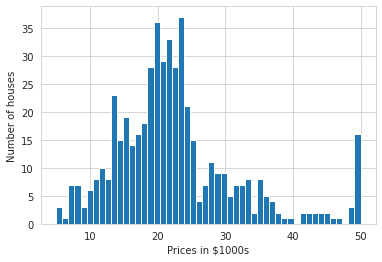

In [ ]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

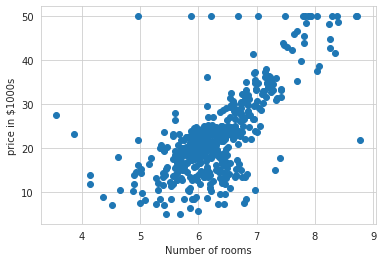

In [ ]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('price in $1000s')
plt.xlabel('Number of rooms')

In [ ]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_df['Price'] = boston.target

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


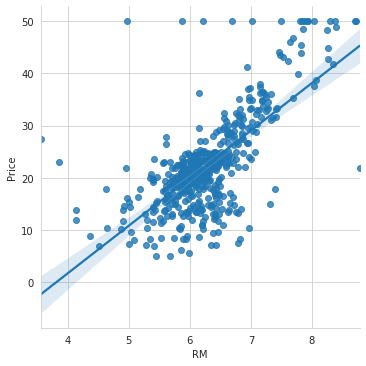

In [ ]:
sns.lmplot(x = 'RM', y = 'Price', data=boston_df)

In [51]:
X = boston_df.RM

In [52]:
X = np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T

In [53]:
#X = np.vstack(boston_df.RM)

In [54]:
X.shape

(506, 2)

In [55]:
Y = boston_df.Price

In [48]:
# [X 1]
#X = np.array([[value,1] for value in X])
#X = np.array([[value,float(1)] for value in X ]) 
#X = X.astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [49]:
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [56]:
m, b = np.linalg.lstsq(X,Y)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [57]:
print(m, b)

9.102108981180315 -34.670620776438575


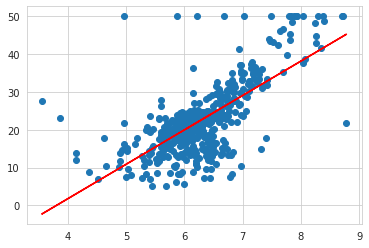

In [61]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x= boston_df.RM

plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [62]:
result = np.linalg.lstsq(X,Y)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print('The root mean square error was %.2f' %rmse)

The root mean square error was 6.60


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [63]:
import sklearn
from sklearn.linear_model import LinearRegression

In [64]:
lreg = LinearRegression()

In [65]:
X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

In [66]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print('The estimated intercept coefficient is %.2f' % lreg.intercept_)
print('The number of coefficients used was %d' %len(lreg.coef_))

The estimated intercept coefficient is 36.46
The number of coefficients used was 13


In [69]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,boston_df.Price)

In [74]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [75]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [78]:
print('Fit a model X_train, and calculate the MSE with Y_train: %.2f' %np.mean((Y_train-pred_train)**2))

print('Fit a model X_train, and calculate MSE X_test and Y_test: %.2f' %np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate the MSE with Y_train: 36.02
Fit a model X_train, and calculate MSE X_test and Y_test: 67.48


Text(0.5, 1.0, 'Residual Plots')

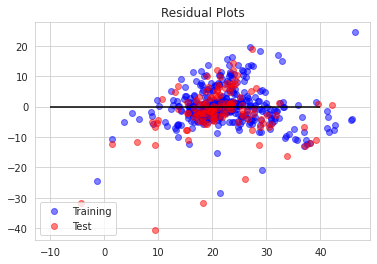

In [80]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b', alpha=0.5)

test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=40)

plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('Residual Plots')